# Chapter 6: Getting Real
Paolo Perrotta, Programming Machine Learning: From Coding to Deep Learning (2020)

## Our Own MNIST Library : Binary classification

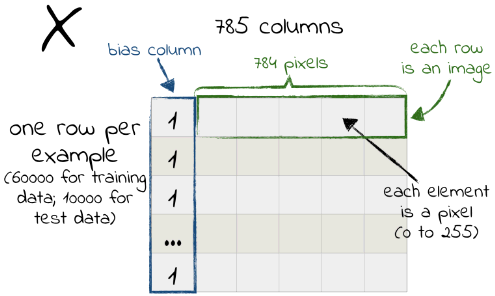

In [1]:
import numpy as np
import gzip
import struct

def load_images(filename):
    # Open and unzip the file of images:
    with gzip.open(filename, 'rb') as f:
        # Read the header information into a bunch of variables:
        _ignored, n_images, columns, rows = struct.unpack('>IIII', f.read(16))
        # Read all the pixels into a NumPy array:
        all_pixels = np.frombuffer(f.read(), dtype=np.uint8)
        # Reshape the pixels into a matrix where each line is an image:
        return all_pixels.reshape(n_images, columns * rows)
    
#x_train = load_images("../data/mnist/train-images-idx3-ubyte.gz")
#x_test  = load_images("../data/mnist/t10k-images-idx3-ubyte.gz")
x_train = load_images("train-images-idx3-ubyte.gz")
x_test  = load_images("t10k-images-idx3-ubyte.gz")

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
def prepend_bias(X):
    # Insert a column of 1s in the position 0 of X.
    # (“axis=1” stands for: “insert a column, not a row”)
    return np.insert(X, 0, 1, axis=1)

# 60000 images, each 785 elements (1 bias + 28 * 28 pixels), X_train is (60000,785) 
X_train = prepend_bias(x_train)

# 10000 images, each 785 elements, with the same structure as X_train, X_test is (10000,785) 
X_test = prepend_bias(x_test)

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 785)
(10000, 785)


In [5]:
def load_labels(filename):
    # Open and unzip the file of images:
    with gzip.open(filename, 'rb') as f:
        # Skip the header bytes:
        f.read(8)
        # Read all the labels into a list:
        all_labels = f.read()
        # Reshape the list of labels into a one-column matrix:
        return np.frombuffer(all_labels, dtype=np.uint8).reshape(-1, 1)

In [6]:
# 60K labels, each a single digit from 0 to 9
#Y_train_unencoded = load_labels("../data/mnist/train-labels-idx1-ubyte.gz")
Y_train_unencoded = load_labels("train-labels-idx1-ubyte.gz")
print(Y_train_unencoded.shape)
print(Y_train_unencoded[0:10])

(60000, 1)
[[5]
 [0]
 [4]
 [1]
 [9]
 [2]
 [1]
 [3]
 [1]
 [4]]


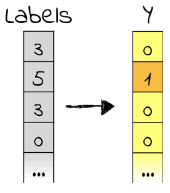

In [7]:
#Y_test_unencoded = load_labels("../data/mnist/t10k-labels-idx1-ubyte.gz")
Y_test_unencoded = load_labels("t10k-labels-idx1-ubyte.gz")
print(Y_test_unencoded.shape)
print(Y_test_unencoded[0:10])

(10000, 1)
[[7]
 [2]
 [1]
 [0]
 [4]
 [1]
 [4]
 [9]
 [5]
 [9]]


In [8]:
def encode_fives(Y):
    encoded_Y = np.zeros_like(Y)
    n_labels = Y.shape[0]
    for i in range(n_labels):
        if Y[i] == 5:
            encoded_Y[i][0] = 1
    return encoded_Y


# 60K labels, each with value 1 if the digit is a five, and 0 otherwise
Y_train = encode_fives(Y_train_unencoded)

# 10000 labels, with the same encoding as Y_train
Y_test = encode_fives(Y_test_unencoded)

In [9]:
print(Y_train.shape)
print(Y_train[0:10])
print(Y_test[0:10])

(60000, 1)
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]


## The Real Thing

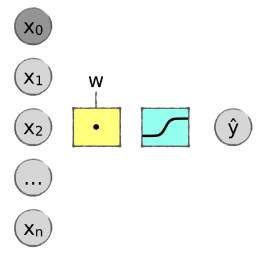

In [10]:
import numpy as np


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def forward(X, w):
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)


def classify(X, w):
    return np.round(forward(X, w))


def loss(X, Y, w):
    y_hat = forward(X, w)
    first_term = Y * np.log(y_hat)
    second_term = (1 - Y) * np.log(1 - y_hat)
    return -np.average(first_term + second_term)


def gradient(X, Y, w):
    return np.matmul(X.T, (forward(X, w) - Y)) / X.shape[0]


def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        if i % 10 == 0:
            print("Iteration %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w


def test(X, Y, w):
    total_examples = X.shape[0]
    correct_results = np.sum(classify(X, w) == Y)
    success_percent = correct_results * 100 / total_examples
    print("\nSuccess: %d/%d (%.2f%%)" %
          (correct_results, total_examples, success_percent))

In [11]:
w = train(X_train, Y_train, iterations=100, lr=1e-5)
test(X_test, Y_test, w)

Iteration    0 => Loss: 0.69314718055994528623
Iteration   10 => Loss: 0.18918194048765815674
Iteration   20 => Loss: 0.16139375633494251749
Iteration   30 => Loss: 0.14757004225490838456
Iteration   40 => Loss: 0.13907040331149911339
Iteration   50 => Loss: 0.13322443624926735839
Iteration   60 => Loss: 0.12890925030445235522
Iteration   70 => Loss: 0.12556430747634386713
Iteration   80 => Loss: 0.12287651630233091538
Iteration   90 => Loss: 0.12065639867328369073

Success: 9637/10000 (96.37%)
